# Circos running in Jupyter served via Binder & 'Hello World' from Circos

This page is primarily based on the following page at the Circos documentation site:

- [1. HELLO WORLD](http://circos.ca/documentation/tutorials/quick_start/hello_world/)

That page is found as part number 1 of the nine part [the 'QUICK START' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).

In addition to the content there, we'll cover using Circos via this Jupyter environment you should be in. If you didn't launch this via Binder you should go [here](http://beta.mybinder.org/v2/gh/fomightez/circos-binderized/master?filepath=index.ipynb) now and do so. Since you may not be familiar with the Jupyter environment, first that will be introduced briefly in order to get on to the Circos content.

----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

----

Those notes above should cover the basics of this page. This is running in a full computational environment. You can get to a file navigation system by clicking on the organge and gray 'Jupyter' logo. You can upload and download there. (There is an advanced interface available via JupyterLab that you may see elsewhere and that will have file handling as a panel on the left.)

With some of the basics out of the way, let's get back to Circos a bit and bring up any of the ways this may still differ from how you'd use Circos elsewhere.  
Circos runs on the command line normally. In these demonstration notebook pages, we will use special `%%bash` tag at the start of cells to specify to send the commands in the cells to the terminal (shell). You'll note that in the upper right corner of these notebook pages that it says `Python`. That is because the default language the cells in these notebooks accept is the Python langage. When appropriate, I'll go beyond the documentation and introduce some useful Python. That will be minimal. However, we will actively take advatange of the Jupyter environment to make using Ciros a bit easier than working directly on the command line.


This is rather technical, but I am explaining the situation here for those curious about the differences in running Circos within these set of active notebooks served via the Binder system as opposed to the command line, and those that might notice a slight difference between this notebook and subsequent ones. It boils down to the fact that in other notebooks in this series of notebooks, you'll need `%%bash` at the start of cells where you are placing code to run Circos. If you want to understand why, continue on to the next paragraph.

With that out of the way. Let's make your first Circos image.

## 'Hello world' Circos-style

This is the first step in the series of nine Quick Guide tutorials . That series of tutorials is stated to be the shortest route to creating an image with Circos under the 'QUICK START' section [here](http://circos.ca/support/getting_started/).

The documentation states the 'QUICK START' section shosw you how to build a Circos image from scratch in pedagogical manner, similar to what you will find in the [Circos course](http://circos.ca/documentation/course). Whereas the other major sections of the tutorials (e.g. [ideograms](http://circos.ca/documentation/tutorials/ideograms/), [scaling](http://circos.ca/documentation/tutorials/scaling/), [highlights](http://circos.ca/documentation/tutorials/highlights), [2D data](http://circos.ca/documentation/tutorials/2d_tracks), [links](http://circos.ca/documentation/tutorials/links)) detail the functions of Circos.

The documentation states this first section shows the *minimum practical Circos configuration* required to obtain an image. Martin, the developer of Circos, includes the word *practical* because there are some parameters that have built-in default values in the code and these *could* be left out. The built-in defaults, however, are a measure of safety, not convenience. Even if parameters do have default values, there are some that you should explicitly include for clarity.

The minimum configuration image shows the 24 human chromosomes as colored segments. As this tutorial progresses, we will be adding optional elements like cytogenetic bands, labels, ticks and, of course, data.

### MINIMUM CONFIGURATION

Much of the 'minimum' configuration is illustrated in the code block below.

```ini
# circos.conf

karyotype = data/karyotype/karyotype.human.txt

<ideogram>

<spacing>
default = 0.005r
</spacing>

radius    = 0.9r
thickness = 20p
fill      = yes

</ideogram>

################################################################
# The remaining content is standard and required. It is imported 
# from default files in the Circos distribution.
#
# These should be present in every Circos configuration file and
# overridden as required. To see the content of these files, 
# look in etc/ in the Circos distribution.

<image>
# Included from Circos distribution.
<<include etc/image.conf>>
</image>

# RGB/HSV color definitions, color lists, location of fonts, fill patterns.
# Included from Circos distribution.
<<include etc/colors_fonts_patterns.conf>>

# Debugging, I/O an dother system parameters
# Included from Circos distribution.
<<include etc/housekeeping.conf>>
```

You'll note that ['Configuration' tab at the 1. HELLO WORLD page](http://circos.ca/documentation/tutorials/quick_start/hello_world/configuration) shows more code, but the block above sets up for the discussion of the main requirements.

The following is adapted from the documentation page:

### KARYOTYPE
The karyotype file is always required. It defines the names, sizes and colors of chromosomes that you will use in the image.

Because Circos can display any data, the meaning of this file is not restricted to chromosomes. Axis segments can be sequence contigs, genes, indexed positions, blocks of time, or any quantity that has an integer-based coordinate system.

Circos ships with several predefined karyotype files for common sequence assemblies: human, mouse, rat, and drosophila. These files are located in `data/karyotype` within the Circos distribution. ([karyotype file details](http://circos.ca/documentation/tutorials/ideograms/karyotypes/)).

When a parameter, such as `karyotype` defines the location of a file, the file path can be relative or absolute. If it is relative, and it is not found relative to the configuration file, the Circos distribution tree is searched for the file. This is why here the directory `data/karyotype` finds the file, even though there is no `data/` directory in this tutorial.

### IDEOGRAMS
Once Circos has a list of the chromosomes that can be drawn, the only other parameters required to create an image are those that define where on the image the ideograms should appear.

This is accomplished with the `<ideogram>` block and the parameters `radius`, `thickness` and `fill`. In addition, you will need the `<spacing>` that defines the separation between ideograms on the figure.

For a figure to be clear and informative, the position and format of the ideograms is important to get just right. Martin dedicates a [full tutorial section for ideograms](http://circos.ca/documentation/tutorials/ideograms/), where you can learn how to adjust spacing, labeling, sizing, cropping and radial position of ideograms.

----

### Generating the plot produced by this example code

The current working directory where code will look for files is where this notebook is. The following command will show where that is in system hierarchy.

(Counter to most other cases, Jupyter doesn't need special `%%bash` tag or `!` syntax for the shell command `pwd` to print the current working directory or `ls` to list files in a directory.)

In [1]:
pwd

'/home/jovyan/notebooks'

The following cell will change the current working directory to where the tutorial configuration file is found in the tutorials.

In [2]:
%cd ../circos-tutorials-0.67/tutorials/1/1/

/home/jovyan/circos-tutorials-0.67/tutorials/1/1


When we use the Jupyter magicks `%cd` command to change the current working directory, it gets printed out in the output.

The following command will allow us to note what is there before we run the circos command to generate the plot.

In [3]:
ls

circos.conf  circos.png  circos.svg


Note that there is no file with an `.svg` extension in the directory at present.

Running the next cell will produce the image seen on [the 'images' tab](http://circos.ca/documentation/tutorials/quick_start/hello_world/images).

(Note that we need `../../../../` to navigate out of the current working directory and point at the `bin` directory containing circos executable.)

In [4]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.25s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.26s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/1/1
debuggroup summary 0.26s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.26s loading configuration from file circos.conf
debuggroup summary 0.26s found conf file circos.conf
debuggroup summary 0.42s debug will appear for these features: output,summary
debuggroup summary 0.42s bitmap output image ./circos.png
debuggroup summary 0.42s SVG output image ./circos.svg
debuggroup summary 0.42s parsing karyotype and organizing ideograms
debuggroup summary 0.52s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.53s applying global and local scaling
debuggroup summary 0.53s allocating image, colors and brushes
debuggroup summary 2.33s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.33s drawing highlights and ideograms
debuggroup outp

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


Ignore the `Use of uninitialized value in subroutine entry` message.

We can verify the SVG file made by running that command is now present by again listing the files in the current working directory.

In [5]:
ls

circos.conf  circos.png  circos.svg


More importantly we can view the produced image files.

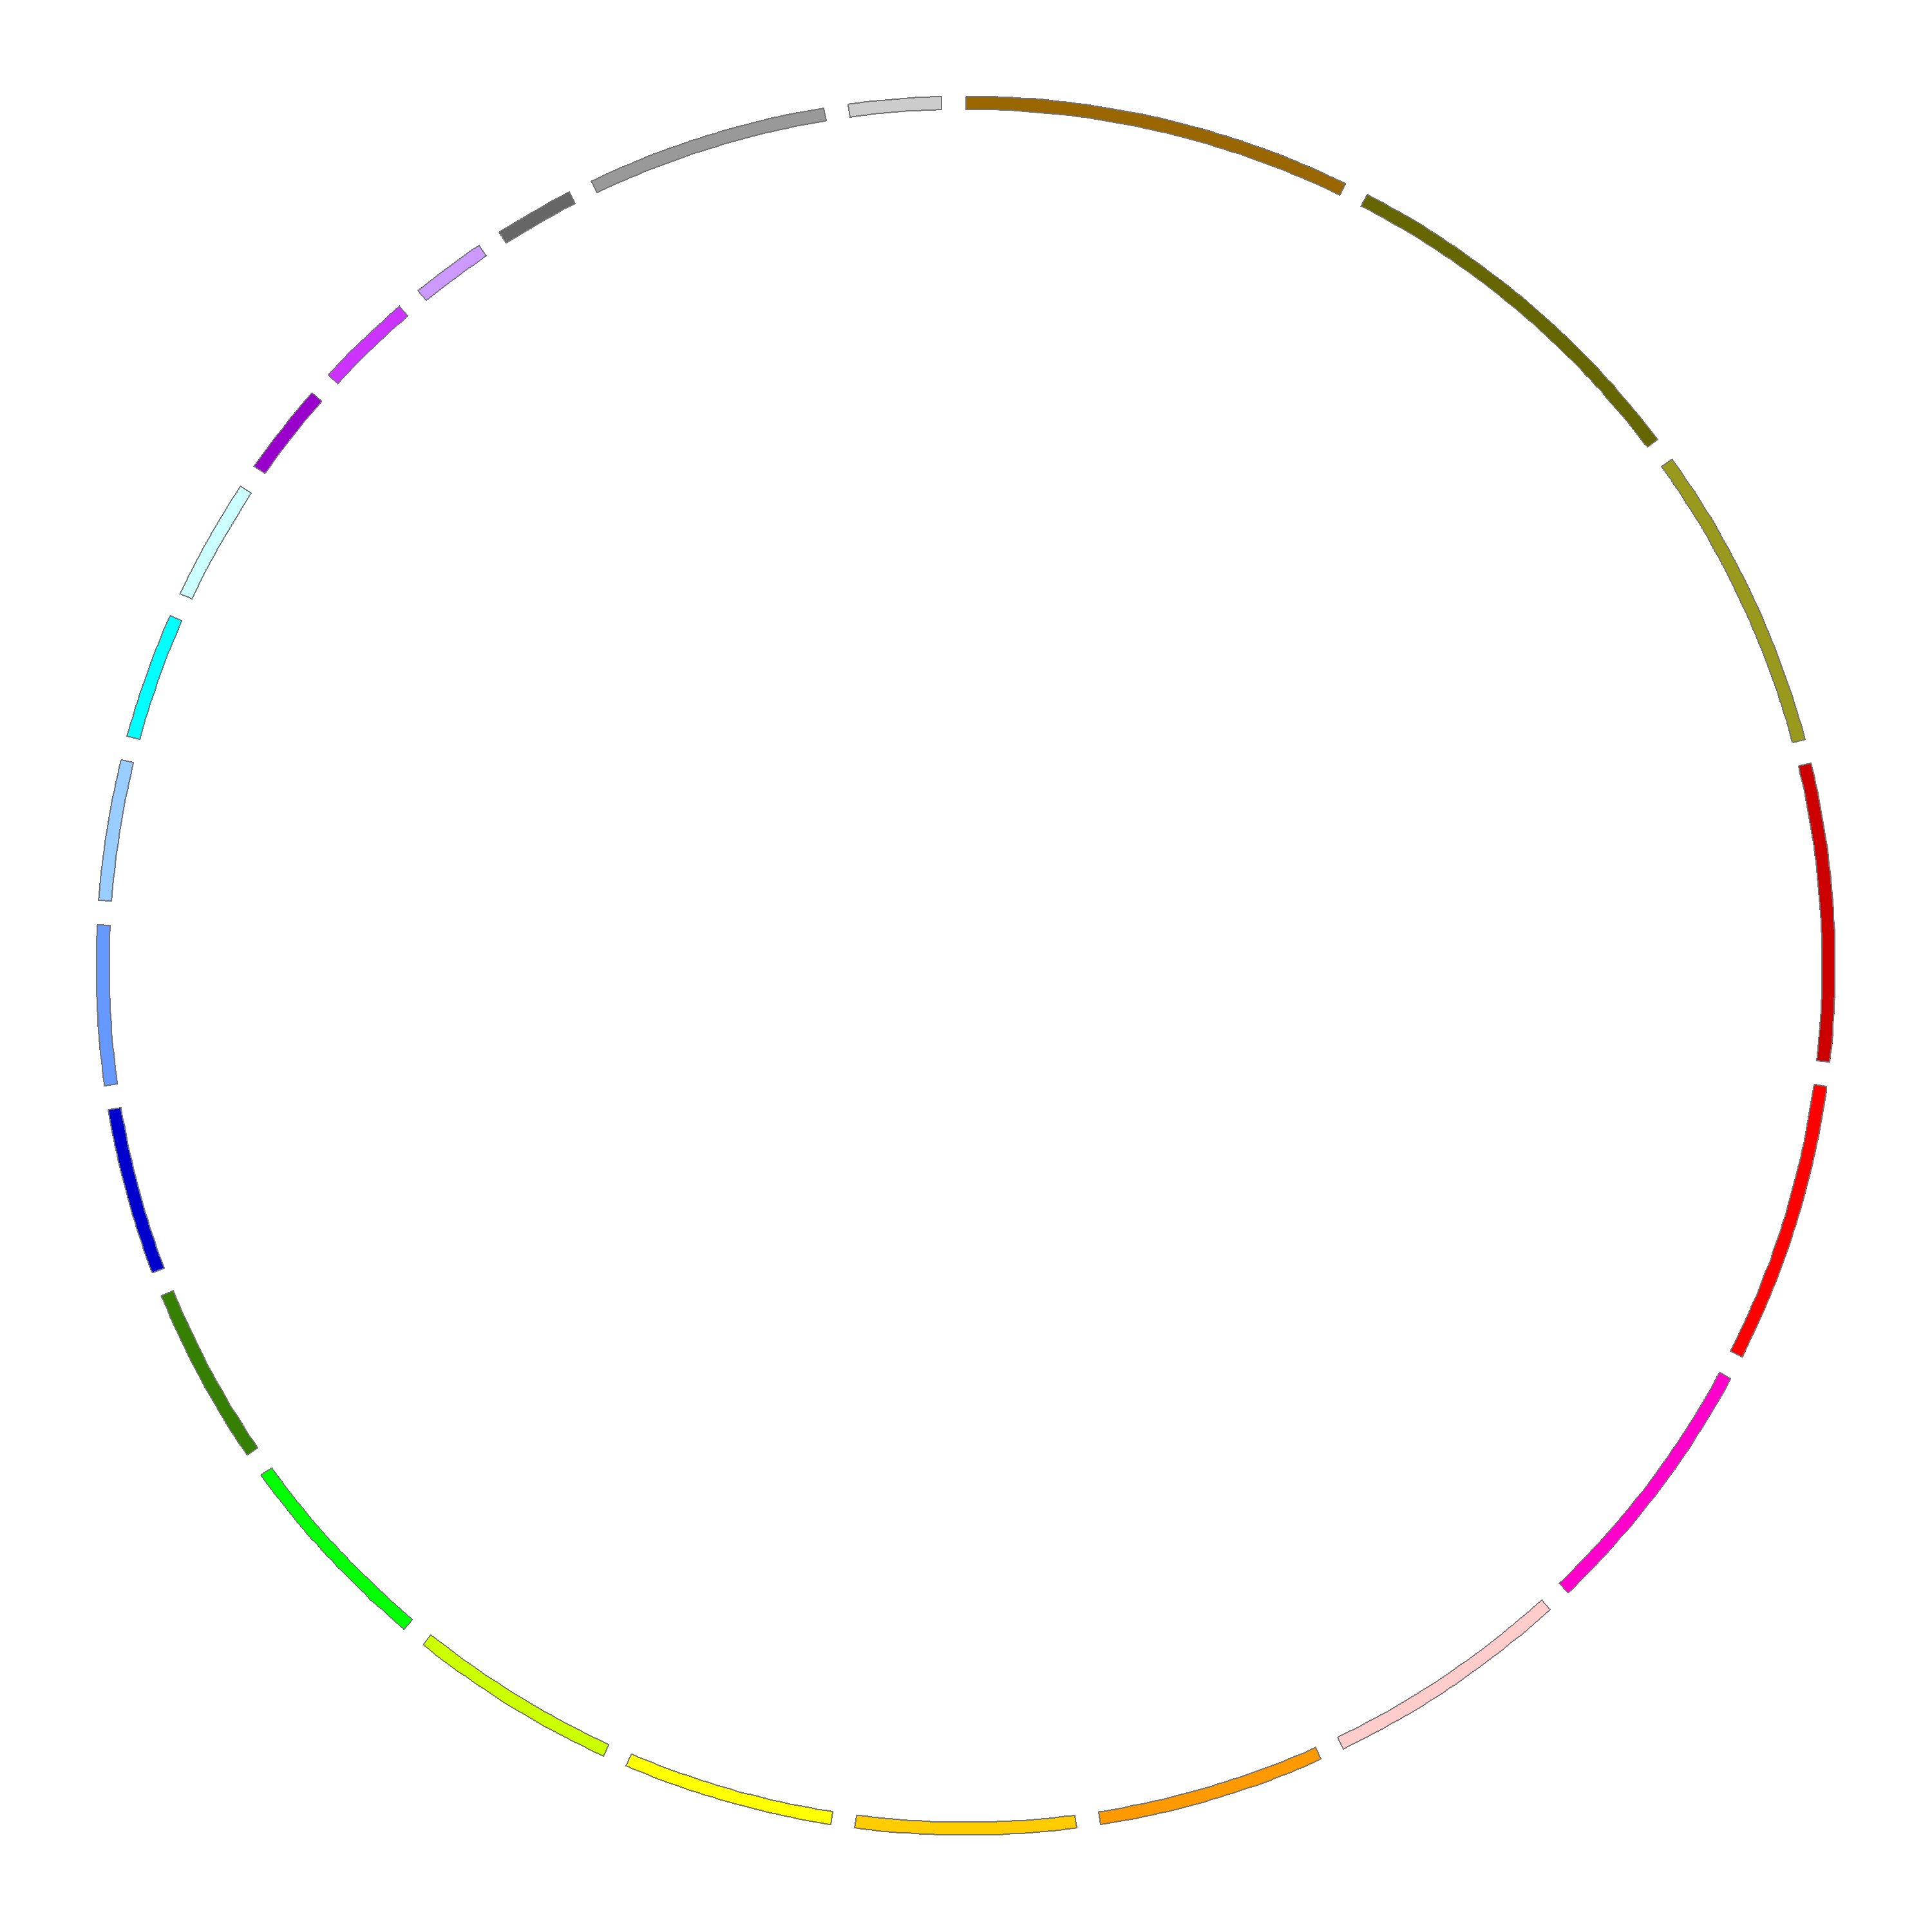

In [6]:
from IPython.display import Image
Image("circos.png")

Bear in mind that the view in the cell above won't reflect the scale/resolution of the actual image file. You will see that in part when the `.svg` format of the file is viewed in the next cell. For actual use and viewing you want to download the file from the running environment and use it on your computer. The Jupyter dashboard accessible from Jupyter logo on the left above this notebook will allow you to navigate to the location of any image and download it. (If you are using JupyterLab, use the file navigation panel.) For downstream use, you'll want to grab the vector graphics file (the `.svg`) because it can be scaled infinitely with no loss or resolution. You probably don't need to really do that with any of these example files;**these tips will only really be important when you start generating your own images after you upload your data to the environment.**

Technical note: Jupyter can display vector graphics in cells; however, because viewing such files involves running code, for security reasons they are not run upon reopening of notebook files. Additionally, they don't scale by default. For these reasons, I have favored using the `.png` image files in these notebooks.

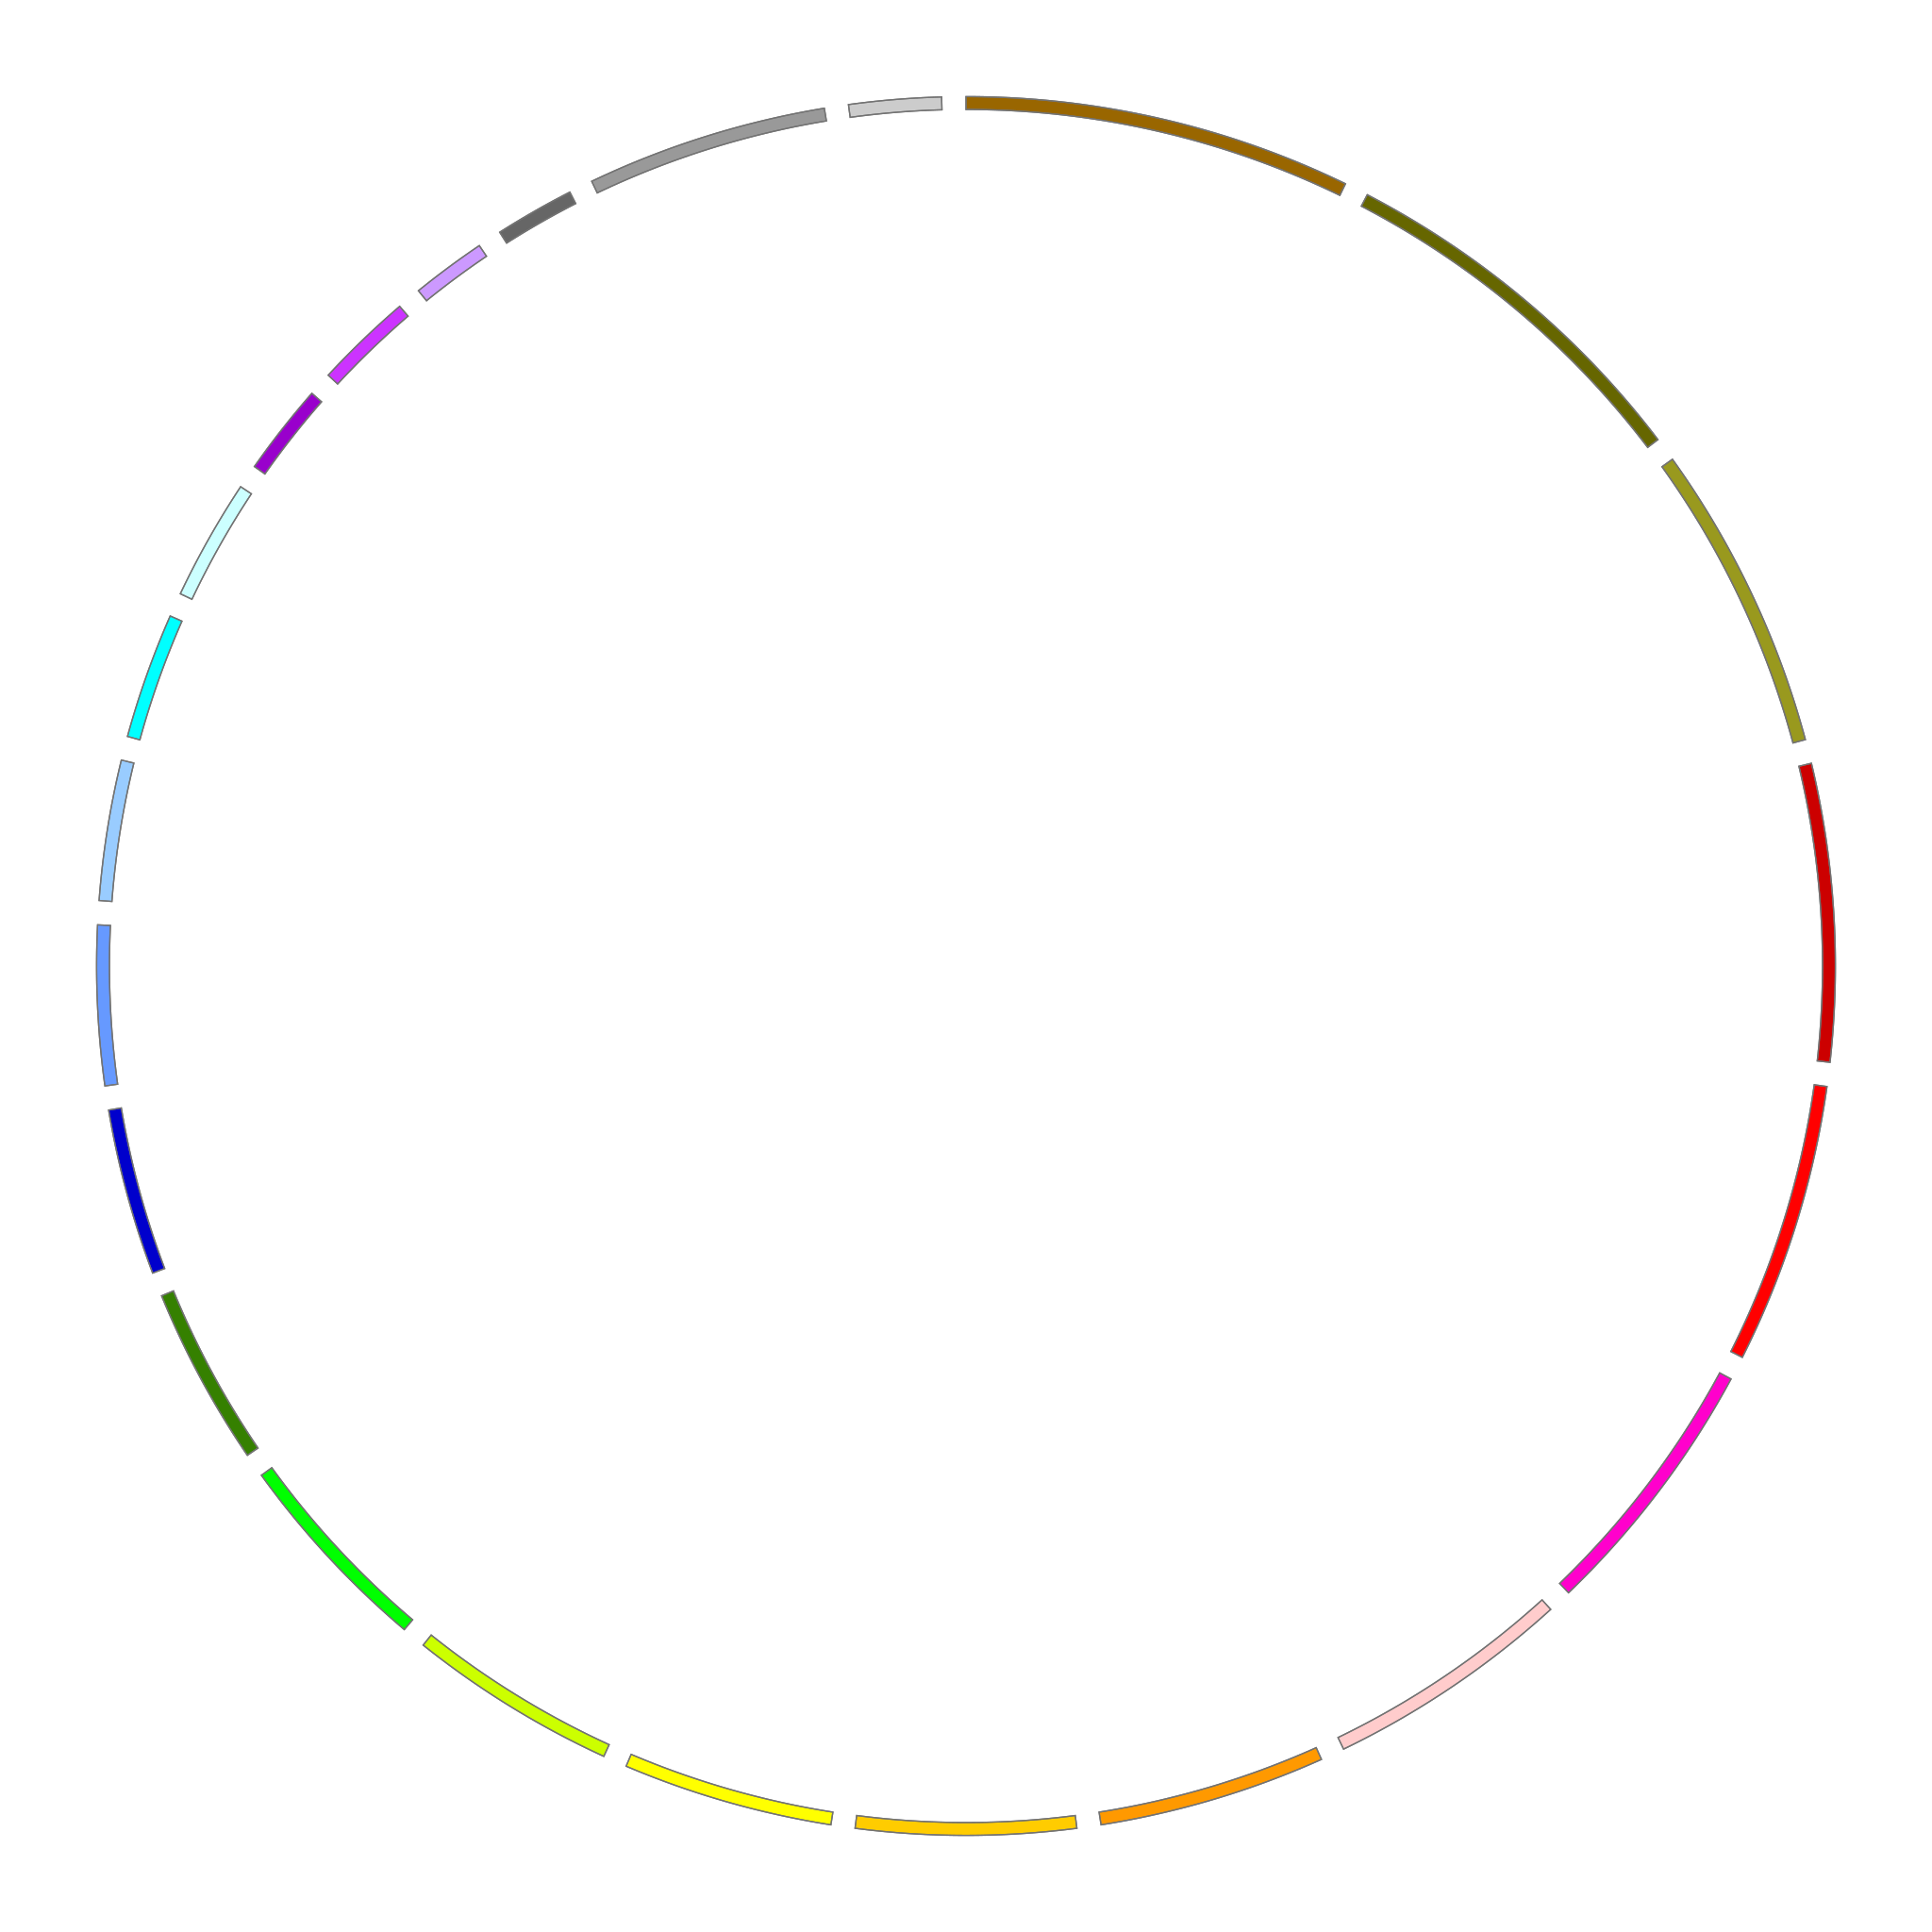

In [7]:
from IPython.core.display import SVG
SVG(filename='circos.svg')

----

Continue on to the next part of the Quick Start series  by clicking [here &#10145;](Quick_Start_Part2.ipynb).

----